<a href="https://colab.research.google.com/github/viniciusendo/dnc_case_varejo/blob/main/DNC_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case - Varejo**
Uma loja de varejo deseja criar algumas métricas para acompanhar seus resultados.
Eles possuem 2 bases de dados, de vendas e a de clientes.

Sua missão é fazer o tratamento e união das bases para construção das seguintes métricas:
- Departamentos mais vendidos
- Média de preço com frete por Nome de Departamento
- Quantidade de vendas por Mês
- Média de renda para cada tipo de canal de venda
- Média de idade de clientes por bandeira

Premissas de negócio:
- Temos um erro de sistema; para compras sem UF, considere o estado do MS
- Preço não pode ser maior do que preço com frete


In [ ]:
# Import das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# **Vendas**

In [ ]:
# Criação do dataframe de vendas
vendas = pd.read_excel("varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
# Correção dos nomes das colunas
vendas = vendas.rename(columns={"Data":"data","Preço":"preco","Preço_com_frete":"preco_com_frete","Nome_Departamento":"departamento","cliente_Log":"cliente_log"})

In [ ]:
# Visualização geral dos dados
vendas.info()

# Vemos que temos dados nulos em duas colunas: a de preço e a de estado.
# Ambos serão corrigidos mais tarde.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   idcompra         80228 non-null  int64         
 1   idcanalvenda     80228 non-null  object        
 2   bandeira         80228 non-null  object        
 3   data             80228 non-null  datetime64[ns]
 4   preco            79926 non-null  float64       
 5   preco_com_frete  80228 non-null  float64       
 6   departamento     80228 non-null  object        
 7   estado           79926 non-null  object        
 8   cliente_log      80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
# idcompra
vendas['idcompra'].nunique()

# Verifica-se que existem idcompra repetidos. Por isso, utilizaremos count ao invés de nunique

55773

In [ ]:
# idcanalvenda
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP","Aplicativo")
vendas.groupby('idcanalvenda').idcompra.count()

# Foi feita uma alteração no nomes da colunas para substituir a categoria APP por Aplicativo, visto que elas são a mesma

idcanalvenda
Aplicativo    24234
Internet      27907
Mobile        28087
Name: idcompra, dtype: int64

In [ ]:
# bandeira
vendas.groupby('bandeira').idcompra.count()

# Verifica-se a existência de 2 bandeiras distintas, com a predominância de B

bandeira
A    32180
B    48048
Name: idcompra, dtype: int64

In [ ]:
# data
print(vendas['data'].min())
print(vendas['data'].max())

# As vendas são referentes ao período jan/23 - abr/23

2023-01-02 00:00:00
2023-04-30 00:00:00


In [ ]:
# preço
vendas['preco'] = vendas['preco'].mask(vendas['preco'].isnull(),vendas['preco_com_frete'])

# Nas colunas onde o valor do preço é nulo, optou-se por utilizar o mesmo valor da coluna preco_com_frete

In [ ]:
# departamento
vendas['departamento'] = vendas['departamento'].str.replace(" ","_")
vendas['departamento'] = vendas['departamento'].str.replace(",","")

# Correção dos nomes dos departamentos para substituir espaços e vírgulas

vendas.groupby('departamento').idcompra.count().sort_values(ascending=False)

# Verifica-se a existência de 32 departamentos distintos e a distribuição da quantidade de vendas de cada um.
# Verifica-se a grande predominância de alguns departamentos.

departamento
Telefones_e_Celulares     15589
Eletrodomesticos          11058
Eletroportateis           10100
TVs_e_Acessorios           5496
Informatica                5438
Beleza_e_Saude             4733
Bebes                      4630
Moveis                     4276
Utilidades_Domesticas      3791
Acessorios_e_Inovacoes     3623
Audio                      1808
Tablets                    1784
Brinquedos                 1327
Ferramentas                1121
Ar_e_Ventilacao             956
Automotivo                  904
Games                       769
Produtos_de_Limpeza         718
Perfumaria                  625
Esporte_e_Lazer             532
Casa_e_Construcao           264
Cama_Mesa_e_Banho           153
Decoracao                   134
Relogios                    134
Malas_e_Mochilas            114
Linha_Industrial             86
Pet_Shop                     43
Cine_e_Foto                  11
TV_e_Video                    5
Moda                          3
Alimentos                  

In [ ]:
# estado
vendas['estado'] = vendas['estado'].fillna("MS")
vendas['estado'].value_counts() ## equivalente a vendas.groupby('estado').idcompra.count().sort_values(ascending=False)

# Como indicado, os valores nulos foram susbtituídos por MS.
# Verifica-se uma concentração grande do número de vendas na região Sudeste.

SP    29896
RJ    17588
MG    11101
RS     4165
PR     2789
BA     2047
SC     1952
DF     1916
PE     1639
GO     1616
ES     1261
CE     1009
PB      536
MT      510
RN      464
AL      462
SE      340
MS      302
PI      247
MA      129
PA      108
TO      101
AM       15
RO       15
AC       10
RR        7
AP        3
Name: estado, dtype: int64

In [ ]:
# cliente_log
vendas['cliente_log'].nunique()

17074

In [ ]:
# comparação preço e preço com frete
vendas = vendas.query("preco_com_frete >= preco")
vendas.info()

# Conforme indicado nas premissas de negócio, foram excluídos os registros onde o preço era maior do que o preço com frete

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80085 entries, 1 to 80227
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   idcompra         80085 non-null  int64         
 1   idcanalvenda     80085 non-null  object        
 2   bandeira         80085 non-null  object        
 3   data             80085 non-null  datetime64[ns]
 4   preco            80085 non-null  float64       
 5   preco_com_frete  80085 non-null  float64       
 6   departamento     80085 non-null  object        
 7   estado           80085 non-null  object        
 8   cliente_log      80085 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [ ]:
# Visualização quantitativa dos valores das vendas
vendas['preco_com_frete'].describe()

count    80085.000000
mean       908.857999
std       1057.710394
min          6.320000
25%        151.056000
50%        535.120000
75%       1215.240000
max      14439.240000
Name: preco_com_frete, dtype: float64

# **Clientes**

In [ ]:
# Criação do dataframe de clientes
clientes = pd.read_excel("cliente_varejo.xlsx")
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
# Correção de colunas
clientes = clientes.rename(columns={"cliente_Log":"cliente_log"})
clientes = clientes.astype({"renda":"float"})
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
# Verificamos a existência de clientes com a mesma chave cliente_log
clientes['cliente_log'].nunique()

# Esse é um problema fundamental, pois as chaves deveriam ser únicas para cada cliente.
# Para contornar este problema na resolução deste case hipotético, vamos utilizar a
# média da idade e da renda de cada um dos valores duplicados por chave.

17074

In [ ]:
clientes = clientes.groupby("cliente_log")['idade','renda'].agg('mean').reset_index()
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17074 entries, 0 to 17073
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_log  17074 non-null  int64  
 1   idade        17074 non-null  float64
 2   renda        17074 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 400.3 KB


<ipython-input-150-c29e20891e5f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clientes = clientes.groupby("cliente_log")['idade','renda'].agg('mean').reset_index()


In [ ]:
# Visualização quantitativa da idade e renda dos clientes
clientes[["idade",'renda']].describe()

,idade,renda
count,17074.000000,17074.000000
mean,53.395291,8241.873371
std,18.287665,3434.434874
min,18.000000,1500.000000
25%,39.666667,5611.000000
50%,53.000000,8237.166667
75%,67.500000,10882.750000
max,89.000000,14999.000000


# **Base unificada de Vendas e Clientes**

In [ ]:
# União das bases de vendas e clientes
df = vendas.merge(clientes, how="left", on="cliente_log")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80085 entries, 0 to 80084
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   idcompra         80085 non-null  int64         
 1   idcanalvenda     80085 non-null  object        
 2   bandeira         80085 non-null  object        
 3   data             80085 non-null  datetime64[ns]
 4   preco            80085 non-null  float64       
 5   preco_com_frete  80085 non-null  float64       
 6   departamento     80085 non-null  object        
 7   estado           80085 non-null  object        
 8   cliente_log      80085 non-null  int64         
 9   idade            80085 non-null  float64       
 10  renda            80085 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 7.3+ MB


In [ ]:
# Adição da coluna mês
df['mes'] = df['data'].dt.month_name()

,idcompra,idcanalvenda,bandeira,data,preco,preco_com_frete,departamento,estado,cliente_log,idade,renda,mes
0,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590,54.0,2050.0,March
1,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478,47.0,8258.0,March
2,440055,Aplicativo,A,2023-01-13,2239.416,2239.416,TVs_e_Acessorios,SP,2933,46.0,8194.0,January
3,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte_e_Lazer,RS,19790,44.0,7069.0,March
4,456225,Internet,A,2023-03-19,1903.200,1903.200,Telefones_e_Celulares,SP,23742,34.5,5591.5,March


# **Perguntas de negócio**

- Departamentos mais vendidos
- Média de preço com frete por Nome de Departamento
- Quantidade de vendas por Mês
- Média de renda para cada tipo de canal de venda
- Média de idade de clientes por bandeira

## Departamentos mais vendidos

In [ ]:
# Por quantidade de vendas
agg_vendas_dpt_qtd = df.groupby("departamento").idcompra.count().sort_values(ascending=False).reset_index()
agg_vendas_dpt_qtd

,departamento,idcompra
0,Telefones_e_Celulares,15571
1,Eletrodomesticos,11040
2,Eletroportateis,10075
3,TVs_e_Acessorios,5489
4,Informatica,5425
5,Beleza_e_Saude,4725
6,Bebes,4621
7,Moveis,4271
8,Utilidades_Domesticas,3777
9,Acessorios_e_Inovacoes,3620


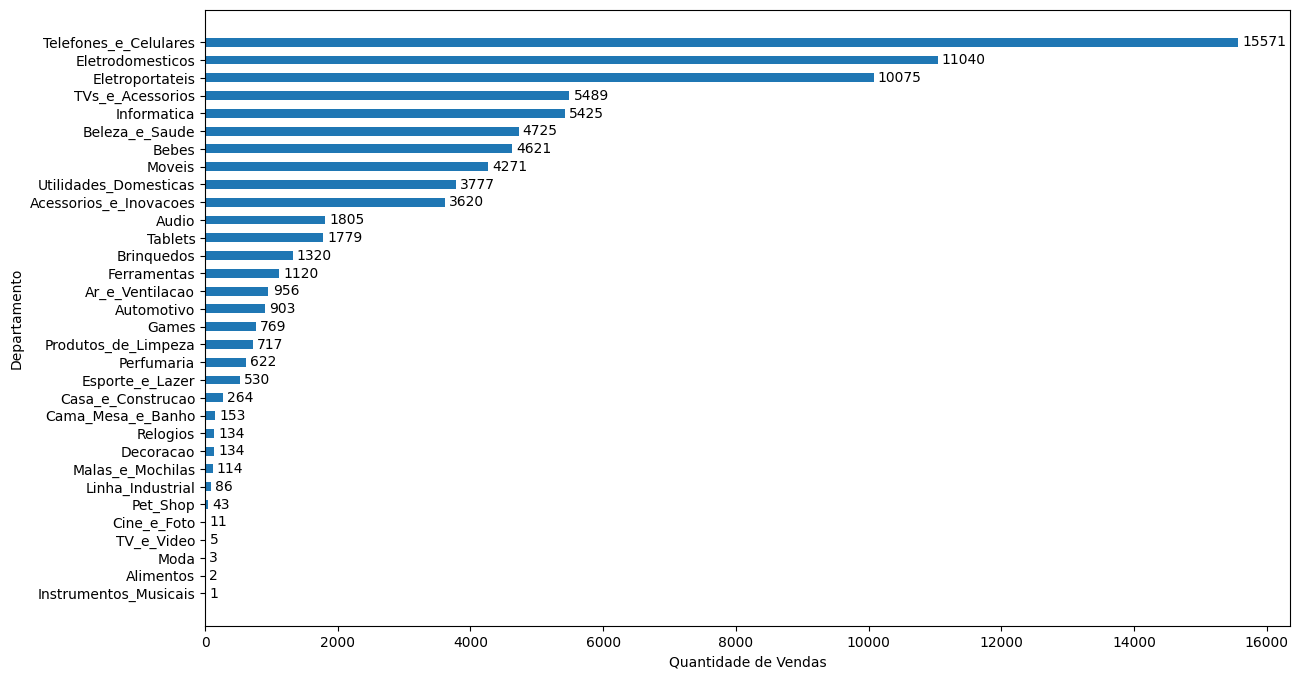

In [ ]:
fig = plt.figure(figsize=(14,8))
bars = plt.barh(agg_vendas_dpt_qtd['departamento'],agg_vendas_dpt_qtd['idcompra'], height=0.5)
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Departamento")
plt.bar_label(bars, padding = 3)
plt.show()


## Média de preço com frete por Departamento

In [ ]:
agg_media_preco_dpt = round(df.groupby("departamento")['preco_com_frete'].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_media_preco_dpt

,departamento,preco_com_frete
0,TV_e_Video,9847.26
1,TVs_e_Acessorios,2058.70
2,Informatica,2017.19
3,Linha_Industrial,1668.68
4,Cine_e_Foto,1461.08
5,Telefones_e_Celulares,1419.26
6,Eletrodomesticos,1233.90
7,Esporte_e_Lazer,1030.68
8,Tablets,962.97
9,Instrumentos_Musicais,834.61


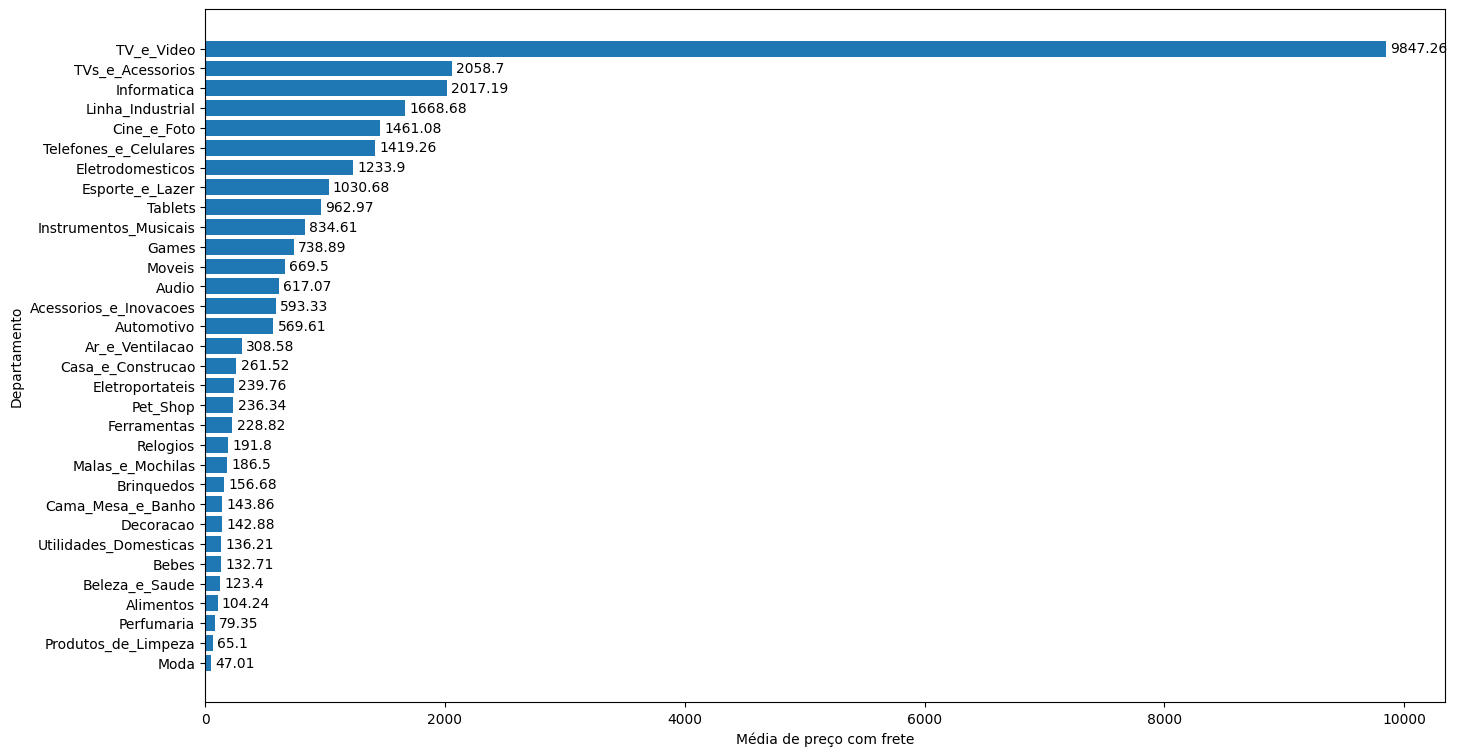

In [ ]:
fig = plt.figure(figsize=(16,9))
bars = plt.barh(agg_media_preco_dpt['departamento'],agg_media_preco_dpt['preco_com_frete'])
plt.xlabel("Média de preço com frete")
plt.ylabel("Departamento")
plt.bar_label(bars, padding = 3)
plt.show()

## Quantidade de Vendas por Mês

In [ ]:
agg_vendas_mes = df.groupby("mes").idcompra.count().reset_index()
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
agg_vendas_mes.index=pd.CategoricalIndex(agg_vendas_mes['mes'],categories=sort_order,ordered=True)
agg_vendas_mes=agg_vendas_mes.sort_index().reset_index(drop=True)
agg_vendas_mes

,mes,idcompra
0,January,19954
1,February,18977
2,March,20948
3,April,20206


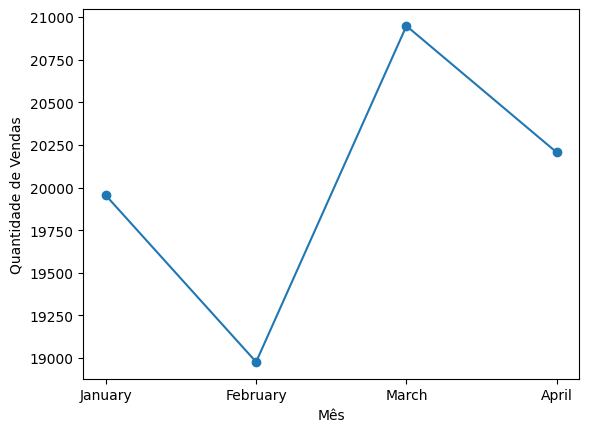

In [ ]:
fig = plt.figure()
bars = plt.plot(agg_vendas_mes["mes"],agg_vendas_mes['idcompra'], marker = 'o')
plt.xlabel("Mês")
plt.ylabel("Quantidade de Vendas")
plt.show()

## Média de renda para cada tipo de canal de venda

In [ ]:
agg_renda_canal = round(df.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending=False).reset_index(),2)
agg_renda_canal

,idcanalvenda,renda
0,Mobile,8250.07
1,Internet,8237.09
2,Aplicativo,8233.76


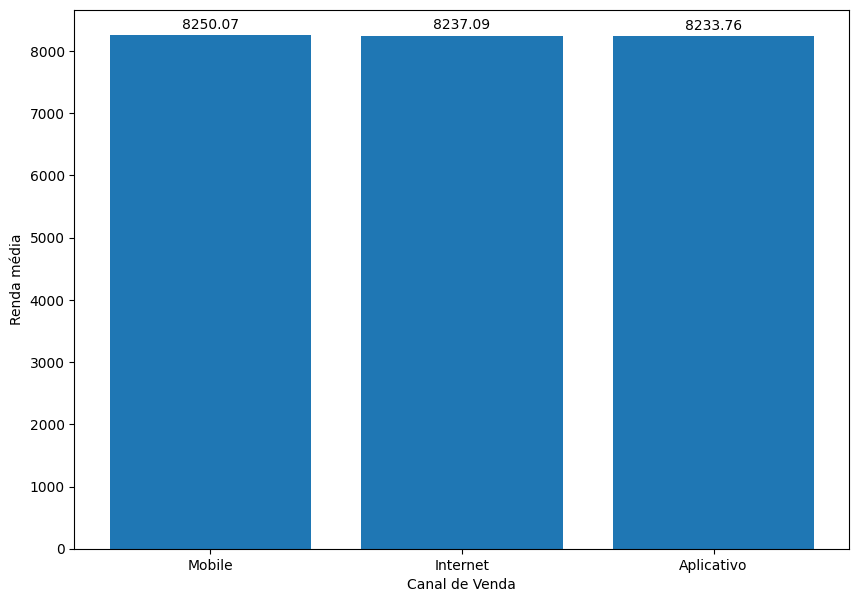

In [ ]:
fig = plt.figure(figsize=(10,7))
bars = plt.bar(agg_renda_canal["idcanalvenda"],agg_renda_canal["renda"])
plt.xlabel("Canal de Venda")
plt.ylabel("Renda média")
plt.bar_label(bars, padding = 3)
plt.show()

## Média de idade de clientes por bandeira

In [ ]:
agg_idade_bandeira = round(df.groupby("bandeira")["idade"].agg("mean"),2).reset_index()
agg_idade_bandeira

,bandeira,idade
0,A,53.39
1,B,53.42


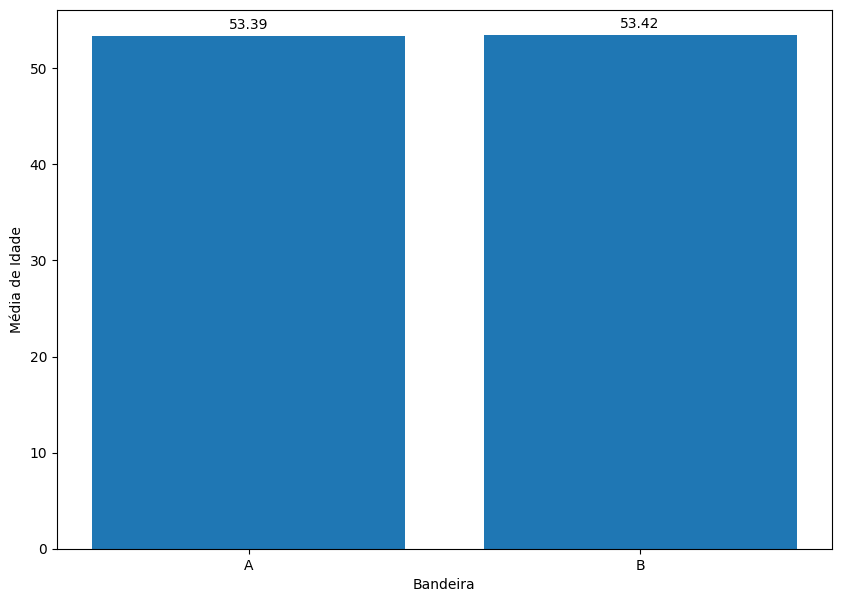

In [ ]:
fig = plt.figure(figsize=(10,7))
bars = plt.bar(agg_idade_bandeira["bandeira"],agg_idade_bandeira["idade"])
plt.xlabel("Bandeira")
plt.ylabel("Média de Idade")
plt.bar_label(bars, padding = 3)
plt.show()